In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]

df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=True, index_col='date')

In [ ]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
ax.plot(df.index, df['value'], linestyle='-', color='g')

In [ ]:
df['year'] = df.index.year
df['month'] = df.index.month_name()

avg = df.groupby(['year', 'month'])['value'].mean().round().unstack().fillna(0)

In [ ]:
avg.plot(kind='bar', stacked=False, xlabel="Years", ylabel="Average Page Views", title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

In [110]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
avg = df_box.groupby(['year', 'month'])['value'].mean().round().unstack().fillna(0)

ValueError: Could not interpret input 'year'

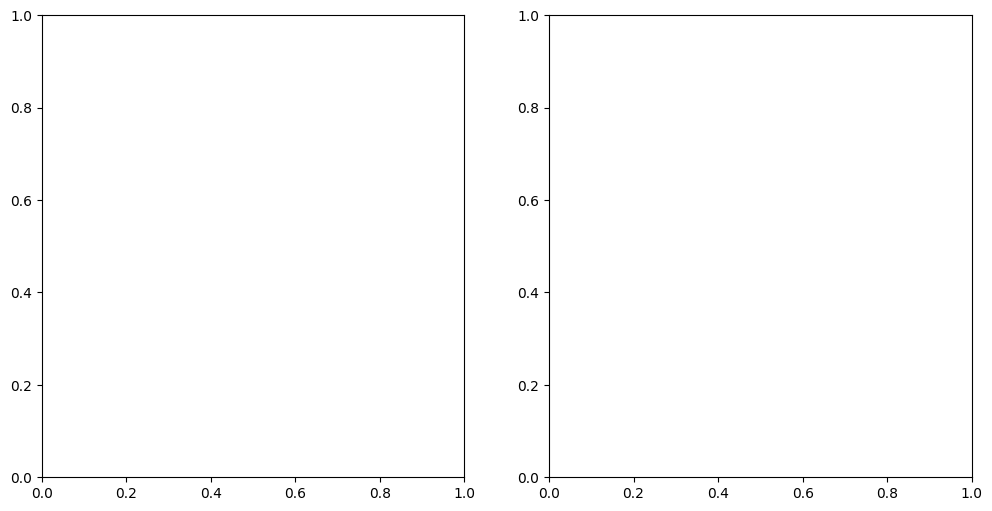

In [112]:
fig, axes = plt.subplots(1, 2)

sns.boxplot(data=avg, x='year', y='value', ax=axes[0])


order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=avg, x='month', y='value', order=order, ax=axes[1])